# Exploration of Listings Data Frame

In [1]:
import pandas as pd
import numpy as np
import geopy
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("tqdm version:", tqdm.__version__)
print("geopy version:", geopy.__version__)

pandas version: 1.4.4
numpy version: 1.23.2
tqdm version: 4.65.0
geopy version: 2.3.0


# Inside Airbnb Listings Dataframe


In [3]:
# data path to datasets
data_path = '[insert path to csv file here]'

In [4]:
# Read in listings.csv file from InsideAirbnb from Austin,TX
inside_airbnb_listings = pd.read_csv('listings_insideairbnb.csv')

In [5]:
'''
This file includes the listings data for all listings in Austin, TX. According to the documentation on their website,
this data was scraped between the two days of 2023-03-16 and 2023-03-17. 
The price column reflects the price on those particular days.
The dataframe has 14,368 listings with 75 columns of information.

'''

inside_airbnb_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20230316044216,2023-03-16,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,2,2,0,0,3.69
1,5769,https://www.airbnb.com/rooms/5769,20230316044216,2023-03-16,previous scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.76,4.92,NaN,f,1,0,1,0,1.75
2,6413,https://www.airbnb.com/rooms/6413,20230316044216,2023-03-16,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.76
3,6448,https://www.airbnb.com/rooms/6448,20230316044216,2023-03-16,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,...,4.97,4.97,4.90,NaN,t,1,1,0,0,2.10
4,8502,https://www.airbnb.com/rooms/8502,20230316044216,2023-03-17,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.86,4.64,4.57,NaN,f,1,1,0,0,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,847159076072987428,https://www.airbnb.com/rooms/847159076072987428,20230316044216,2023-03-17,city scrape,Central Austin Bungalow!,"This is a 4 bedroom, 2 bathroom condo in the h...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,276920863,...,NaN,NaN,NaN,NaN,t,41,41,0,0,NaN
14364,847171709264672413,https://www.airbnb.com/rooms/847171709264672413,20230316044216,2023-03-17,city scrape,Fresh Austin Studio Apartment!,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,276920863,...,NaN,NaN,NaN,NaN,t,41,41,0,0,NaN
14365,847178203609366885,https://www.airbnb.com/rooms/847178203609366885,20230316044216,2023-03-16,city scrape,Quaint Austin Condo!,"In the heart of Central Austin, you can't go w...",NaN,https://a0.muscache.com/pictures/537356ed-2938...,276920863,...,NaN,NaN,NaN,NaN,t,41,41,0,0,NaN
14366,847256590826352221,https://www.airbnb.com/rooms/847256590826352221,20230316044216,2023-03-16,city scrape,NEW! Aqua Azul Outdoors - Near Lake Travis,"Escape to our charming home, just a stone's th...","About 20 miles northwest of downtown Dustin, H...",https://a0.muscache.com/pictures/prohost-api/H...,499116561,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [6]:
print('The shape of this dataframe is', inside_airbnb_listings.shape)


The shape of this dataframe is (14368, 75)


# Listings.csv Data Exploration

In [7]:
# Check to realize how many unique listings there are on the raw file.
inside_airbnb_listings['id'].nunique()


14368

In [8]:
# Check to realize the NaN value counts per column.
# inside_airbnb_listings.isnull().sum().to_dict()

In [9]:
# Amount of neighbourhoods in dataframe
inside_airbnb_listings['host_neighbourhood'].value_counts().count()

# Too many to add to analysis

630

In [10]:
# Zip Codes
inside_airbnb_listings['neighbourhood_cleansed'].value_counts().count()

44

In [11]:
# Count zip code frequencies
zipcodeval = inside_airbnb_listings['neighbourhood_cleansed'].value_counts()

# Select the top ten most prevalent zip codes and their counts
zten = zipcodeval.head(10)

print(zten)

78704    2248
78702    1725
78741     952
78701     931
78745     728
78703     661
78705     580
78751     522
78723     504
78758     438
Name: neighbourhood_cleansed, dtype: int64


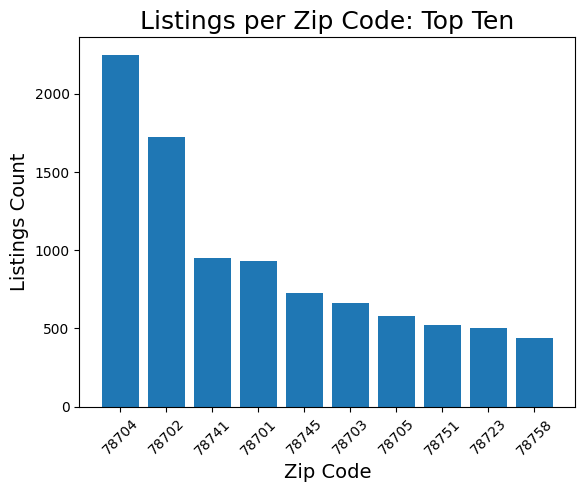

In [13]:
'''
Setup for top ten zip codes for amount of listings across Austin, TX.
'''
ztenc = zten.index.astype(str)
ztenv = zten.values

# Create the bar chart
plt.bar(ztenc, ztenv)

# Add labels and title
plt.xlabel('Zip Code', fontsize=14)
plt.ylabel('Listings Count', fontsize=14)
plt.title('Listings per Zip Code: Top Ten', fontsize=18)

plt.xticks(rotation=45)

plt.show()

In [14]:
inside_airbnb_listings['property_type'].value_counts()
# Perhaps too many to add to analysis

Entire home                        5205
Entire rental unit                 2987
Private room in home               1552
Entire condo                       1314
Entire guesthouse                   656
                                   ... 
Shared room in townhouse              1
Private room in casa particular       1
Shared room in guest suite            1
Tipi                                  1
Shared room in camper/rv              1
Name: property_type, Length: 70, dtype: int64

In [15]:
data_var = inside_airbnb_listings['property_type'].value_counts().head(10) 
data_var

Entire home                    5205
Entire rental unit             2987
Private room in home           1552
Entire condo                   1314
Entire guesthouse               656
Private room in rental unit     411
Entire townhouse                366
Entire guest suite              285
Entire bungalow                 247
Entire loft                     120
Name: property_type, dtype: int64

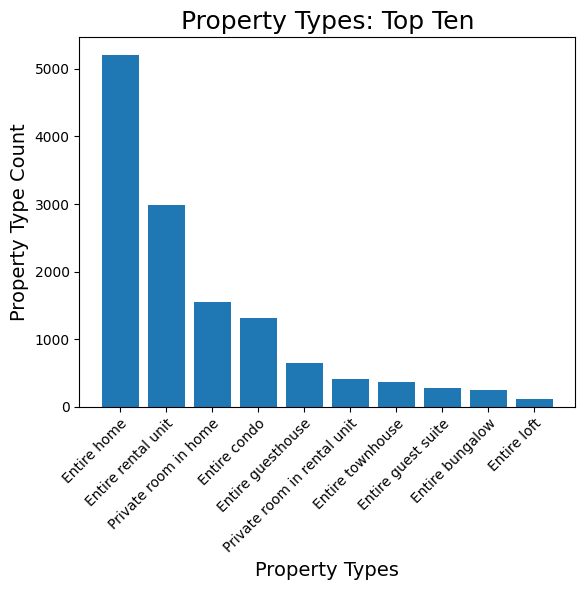

In [16]:
'''
Setup for top ten property types amount for listings across Austin, TX.
'''
# Create the bar chart
plt.bar(data_var.index, data_var)

# Add labels and title
plt.xlabel('Property Types', fontsize=14)
plt.ylabel('Property Type Count', fontsize=14)
plt.title('Property Types: Top Ten', fontsize=18)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.show()

# Data Mapping

In [17]:
'''

Map the listings locations onto a map of Austin

'''

'\n\nMap the listings locations onto a map of Austin\n\n'

In [19]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.ticker as mticker

In [20]:
# Coordinates sourced from GoogleMaps - lat, long

# Texas Capitol coords 
t_cap = (30.27494739275662, -97.74038005499503)

# Barton Spring coords 
barton_springs = (30.264313040205653, -97.77130428958358)

# Lyndon B. Johnson Library & Museum
lyndon_library = (30.285932343275405, -97.72918194747368)

# Bullock State Museum 
bullock = (30.280420360552085, -97.73904724562665)

# Ann W. Richards Congress Bridge
congress_bridge = (30.262679277470813, -97.74476043398026)

# Zilker Metro Park
zilker = (30.26742874371506, -97.772938709499)

# University of Texas Tower
ut_tower = (30.28639177754446, -97.73941402320536)

# DKR Stadium UT Football
dkr_stadium = (30.283675939587837, -97.73240276590948)

# Mexic-Arte Museum
mex_arte = (30.26697300377302, -97.74270657261515)

# McKinney State Park
mckinney = (30.193317823399394, -97.72431871269195)

# Umlauf Sculpture Garden and Museum
umlauf = (30.263499208682216, -97.76621997630959)

# Mount Bonnell
bonnell = (30.321843891816012, -97.77289219659404)

# Museum of the Weird
museum_weird = (30.267176641146776, -97.73873437630948)

# Sourced these 'top options' from https://www.planetware.com/tourist-attractions-/austin-us-tx-a.htm

In [21]:
# Create a data frame for the top locations for visual analysis
top_locs = pd.DataFrame({'names': ['t_cap', 'barton_springs', 'lyndon_library', 'bullock', 'congress_bridge', 'zilker', 'ut_tower', 'dkr_stadium', 'mex_arte', 'mckinney', 'umlauf', 'bonnell', 'museum_weird'], 
                        'latitude': [t_cap[0], barton_springs[0], lyndon_library[0], bullock[0], congress_bridge[0], zilker[0], ut_tower[0], dkr_stadium[0], mex_arte[0], mckinney[0], umlauf[0], bonnell[0], museum_weird[0]],
                        'longitude': [t_cap[1], barton_springs[1], lyndon_library[1], bullock[1], congress_bridge[1], zilker[1], ut_tower[1], dkr_stadium[1], mex_arte[1], mckinney[1], umlauf[1], bonnell[1], museum_weird[1]]})

In [22]:
top_locs

,names,latitude,longitude
0,t_cap,30.274947,-97.740380
1,barton_springs,30.264313,-97.771304
2,lyndon_library,30.285932,-97.729182
3,bullock,30.280420,-97.739047
4,congress_bridge,30.262679,-97.744760
5,zilker,30.267429,-97.772939
6,ut_tower,30.286392,-97.739414
7,dkr_stadium,30.283676,-97.732403
8,mex_arte,30.266973,-97.742707
9,mckinney,30.193318,-97.724319


In [23]:
''' 
Geojson file for Austion Zip Codes can be found various ways. For ease, .json is posted on Github 
Used as a map of all Texas zip code coordinates to then condense or as a direct mapping for Austin
Texas Geojson file is sourced from GitHub, https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/README.md
Austin Geojson file is sourced from - https://openaustin.carto.com/u/oa-admin/tables/austin_area_zip_codes/public?redirected=true
Zip code information can be easily accessed from US Census Bureau website.
'''
austin_map = gpd.read_file("Zipcodes.geojson")
austin_map["zipcode"] = austin_map["zipcode"].astype(int)

print(type(austin_map))
display(austin_map.head())

<class 'geopandas.geodataframe.GeoDataFrame'>


,zipcode,name,number_of_records,objectid,zipcodes_id,geometry
0,78702,AUSTIN,45,51,45,"MULTIPOLYGON (((-97.69187 30.24848, -97.69173 ..."
1,78642,LIBERTY HILL,NaN,26,20,"MULTIPOLYGON (((-97.89359 30.78212, -97.88880 ..."
2,78752,AUSTIN,30,11,5,"MULTIPOLYGON (((-97.68635 30.33260, -97.68514 ..."
3,78747,AUSTIN,25,32,26,"MULTIPOLYGON (((-97.73618 30.15987, -97.73592 ..."
4,78653,MANOR,2,29,23,"MULTIPOLYGON (((-97.50149 30.47733, -97.50610 ..."


In [25]:
zipcode = inside_airbnb_listings[['neighbourhood_cleansed', 'id']] 

C:\Users\sam23\AppData\Local\Temp\ipykernel_8352\2774301610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df["Point"] = listings_df.apply(lambda row: \
C:\Users\sam23\AppData\Local\Temp\ipykernel_8352\2774301610.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([f'{count}' for count in cbar_labels], fontdict={'fontsize': 14, 'fontweight':'bold'})


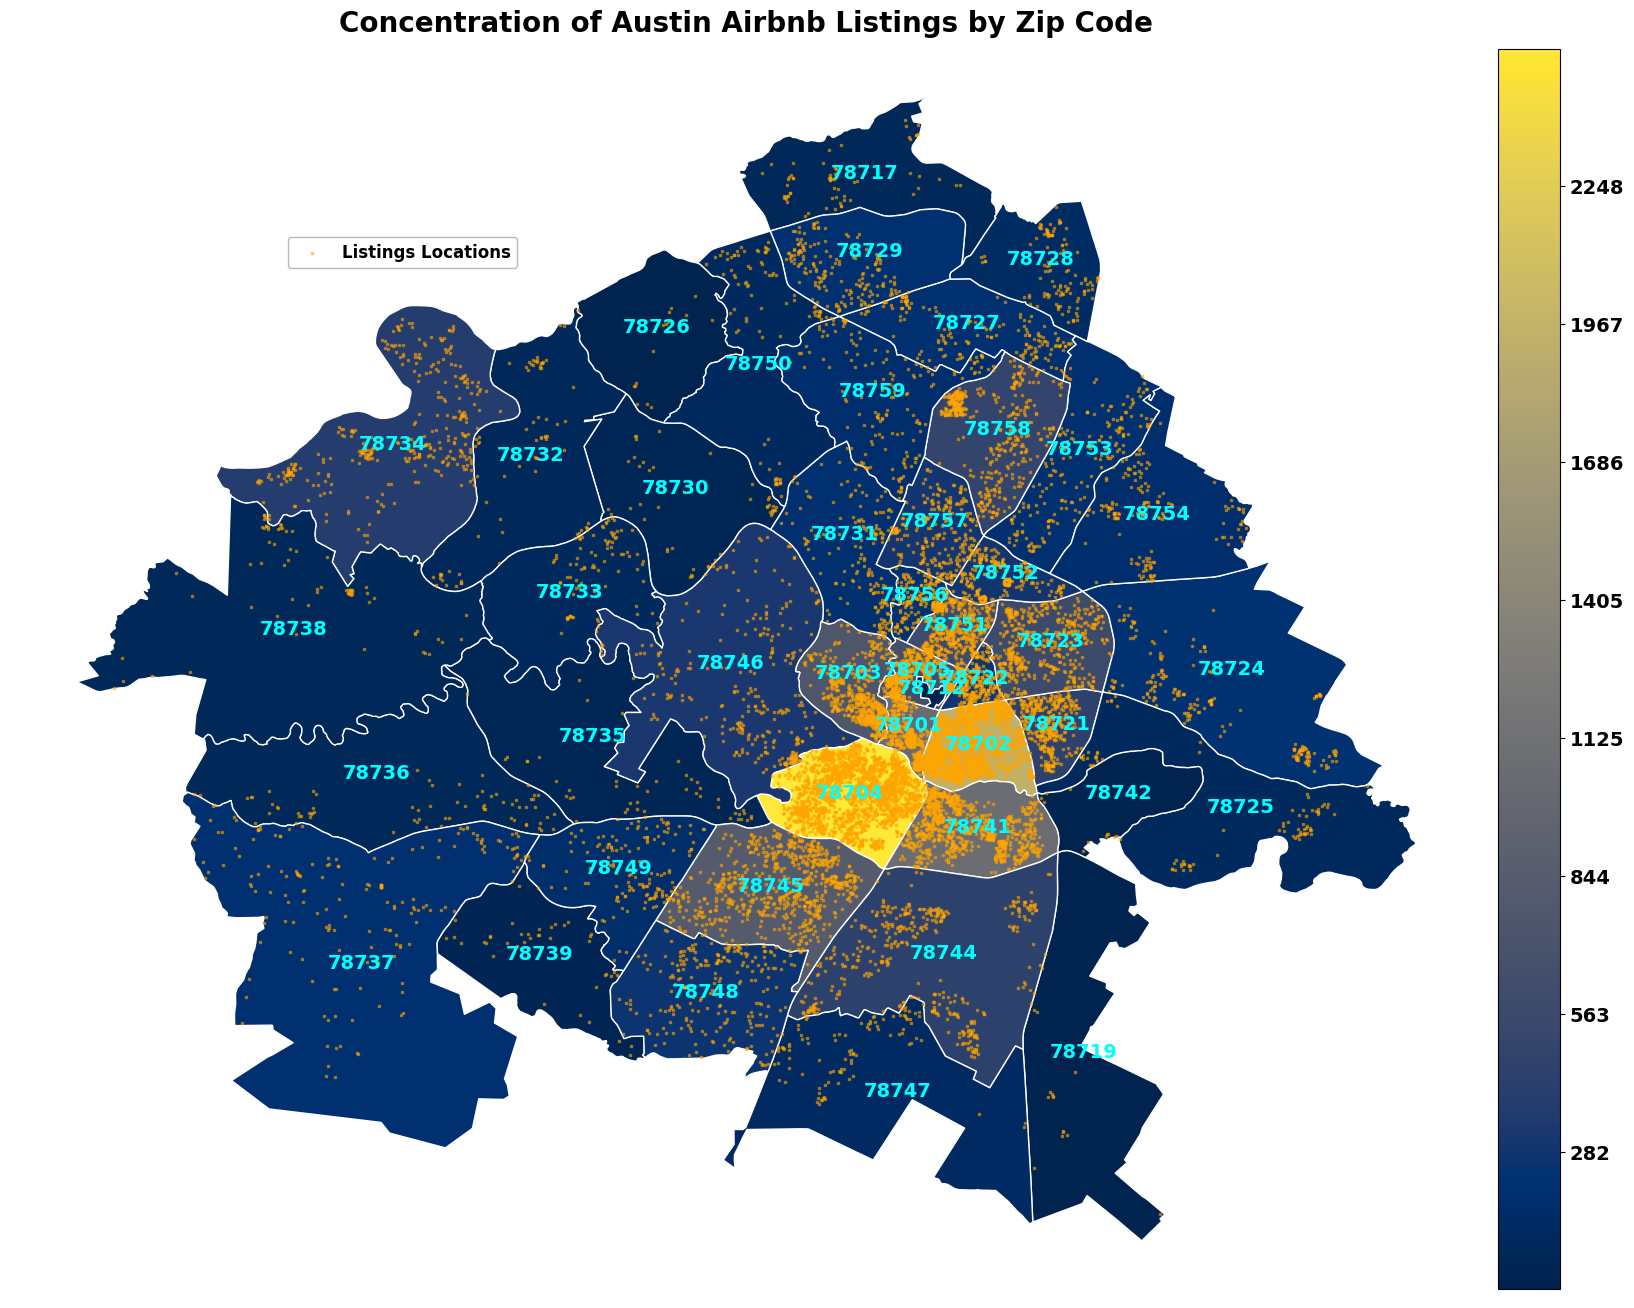

In [26]:
'''
Visual of all listings locations overlay onto Austin Zip Code boundary map. 
Boundaries are color gradient to represent count of listings in each respective zip code.
'''

listings_df = inside_airbnb_listings[["neighbourhood_cleansed", "id", "latitude", "longitude"]]
                         
listings_df["Point"] = listings_df.apply(lambda row: \
                                         Point(row["longitude"], \
                                               row["latitude"]), axis=1)
listings_df = gpd.GeoDataFrame(listings_df, geometry="Point")


list_df = zipcode.pivot_table(index="neighbourhood_cleansed", values="id", aggfunc="count")
list_df = austin_map.merge(list_df, how="right", left_on="zipcode", right_on="neighbourhood_cleansed")
list_df = list_df.set_index("zipcode")

fig, ax = plt.subplots(figsize=(20,20))

base = list_df.plot(column="id", cmap="cividis", \
                     edgecolor="white", ax=ax)

base.axis("off")

min_count = list_df["id"].min()
max_count = list_df["id"].max()
gradient = plt.cm.ScalarMappable(cmap="cividis", \
                                 norm=plt.Normalize(vmin=min_count, \
                                                    vmax=max_count))
gradient._A = []

cbar = fig.colorbar(gradient, fraction=0.04, pad=0.01)

cbar_labels = np.linspace(min_count, max_count, num=9).astype(int)  
cbar.ax.set_yticklabels([f'{count}' for count in cbar_labels], fontdict={'fontsize': 14, 'fontweight':'bold'})


listings_df.plot(ax=base, color="orange", marker="s", markersize=1.5, \
                 alpha=.5, label="Listings Locations")

list_df.apply(lambda x: ax.annotate(text=x.name, \
                                     xy=x.geometry.centroid.coords[0], \
                                     ha="center", fontweight="bold", \
                                     fontsize=14, color="cyan"), axis=1)

legend = plt.legend(facecolor="w", edgecolor="darkgray", prop={'size':12, 'weight':'bold'})
legend.set_bbox_to_anchor((0.25, 0.75, 0.10, 0.10))

plt.title("Concentration of Austin Airbnb Listings by Zip Code", fontsize=20, fontweight="bold")

plt.show()


In [28]:
list_prices = inside_airbnb_listings[['neighbourhood_cleansed', 'price', 'id']]

In [29]:
# Convert prices on raw dataset to numerical values and remove '$'
list_prices['price'] = list_prices['price'].str.replace('$','')
list_prices['price'] = list_prices['price'].str.replace(',','')
list_prices['price'] = list_prices['price'].astype(float)

C:\Users\sam23\AppData\Local\Temp\ipykernel_8352\4132287459.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  list_prices['price'] = list_prices['price'].str.replace('$','')
C:\Users\sam23\AppData\Local\Temp\ipykernel_8352\4132287459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_prices['price'] = list_prices['price'].str.replace('$','')
C:\Users\sam23\AppData\Local\Temp\ipykernel_8352\4132287459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,neighbourhood_cleansed,price,id
0,78702,176.0,5456
1,78729,42.0,5769
2,78704,109.0,6413
3,78704,240.0,6448
4,78741,85.0,8502
...,...,...,...
14363,78705,129.0,847159076072987428
14364,78705,54.0,847171709264672413
14365,78705,145.0,847178203609366885
14366,78734,144.0,847256590826352221


C:\Users\sam23\AppData\Local\Temp\ipykernel_8352\1153621580.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['$0', '$200', '$400', '$600', '$800', '$1000', '$1200'], fontdict={'fontsize': 14, 'fontweight':'bold'})


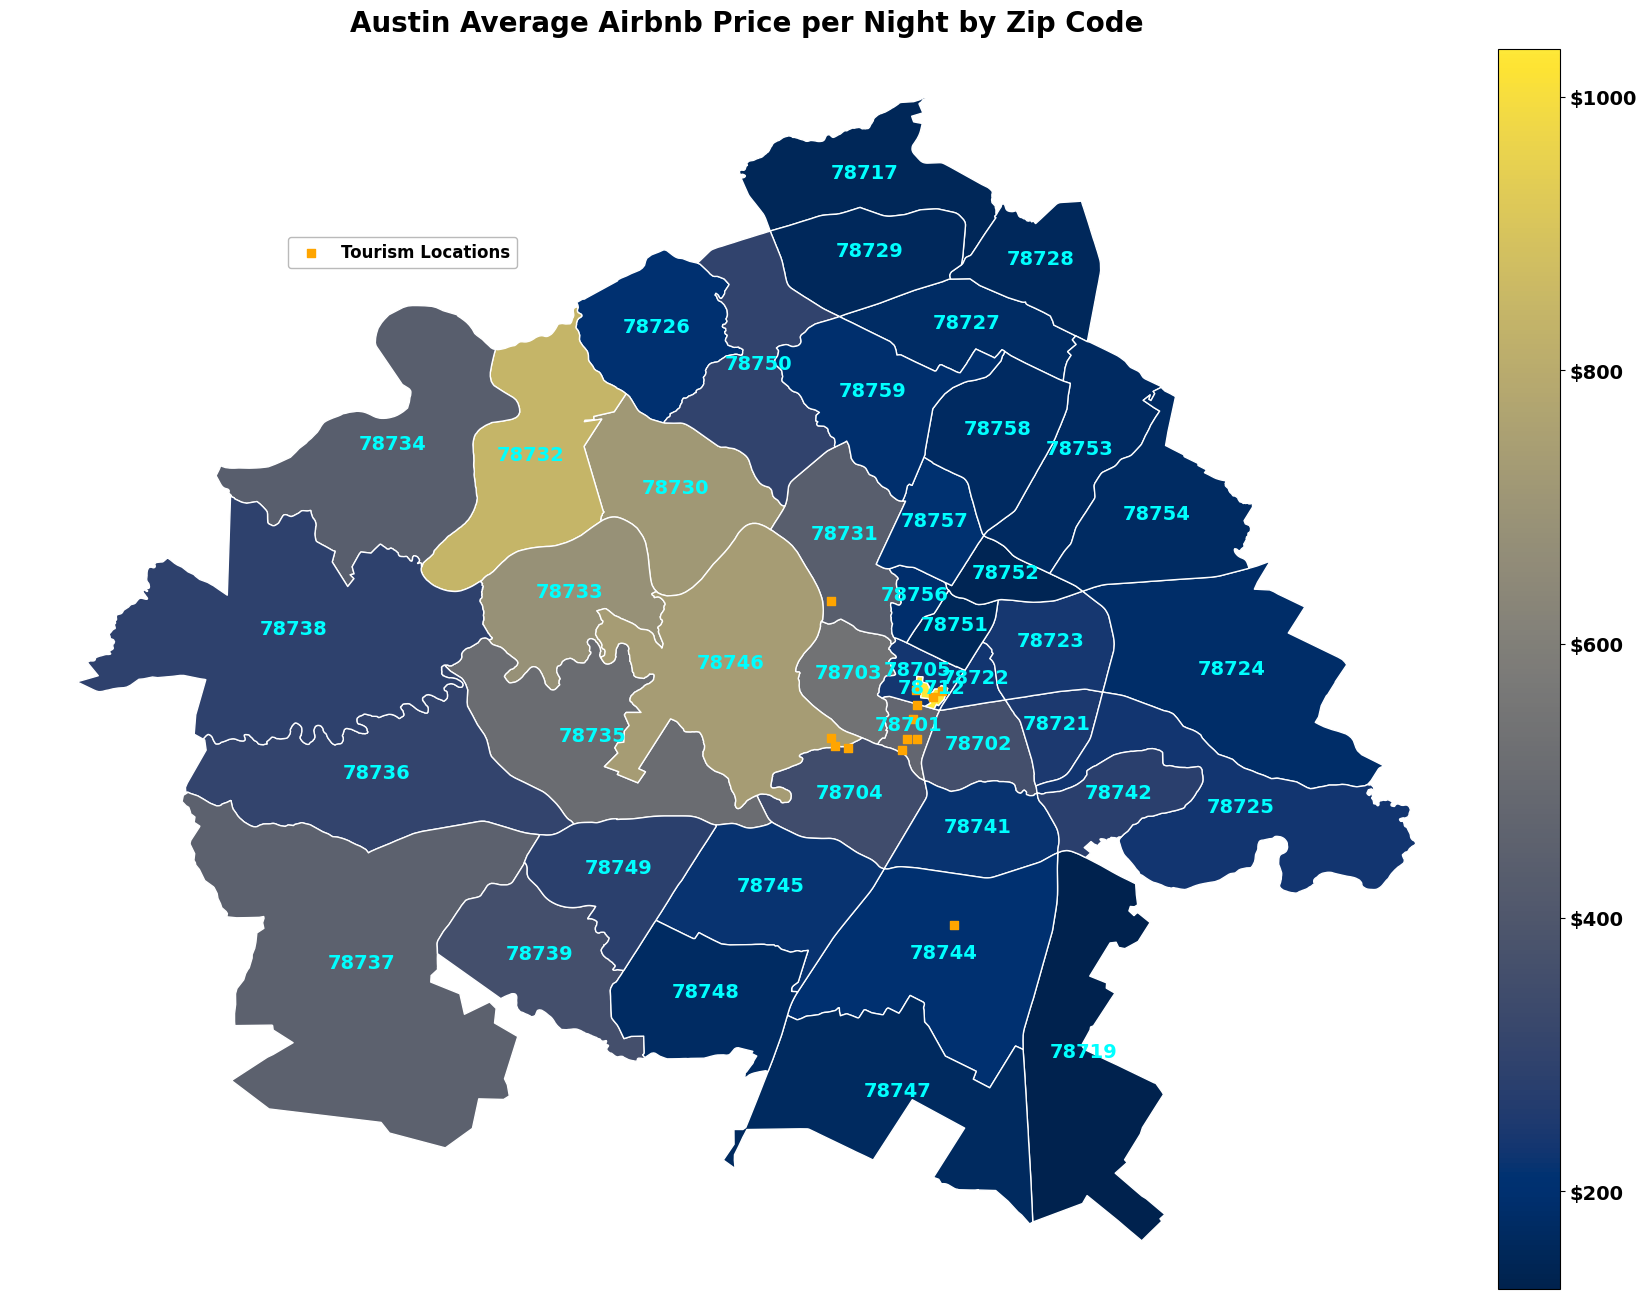

In [33]:
'''
Visual of top tourism locations overlay onto Austin Zip Code boundary map. 
Zip codes are color gradient to represent average price for one night across all listings in each respective zip code.
'''

top_locs["Point"] = top_locs.apply(lambda row: \
                                         Point(row["longitude"], \
                                               row["latitude"]), axis=1)
top_locs = gpd.GeoDataFrame(top_locs, geometry="Point")


price_df = list_prices.pivot_table(index="neighbourhood_cleansed", values="price", aggfunc="mean")
price_df = austin_map.merge(price_df, how="right", left_on="zipcode", right_on="neighbourhood_cleansed")
price_df = price_df.set_index("zipcode")

fig, ax = plt.subplots(figsize=(20,20))

base = price_df.plot(column="price", cmap="cividis", \
                     edgecolor="white", ax=ax)
price_df.apply(lambda x: ax.annotate(text=x.name, \
                                     xy=x.geometry.centroid.coords[0], \
                                     ha="center", fontweight="bold", \
                                     fontsize=14, color="cyan"), axis=1)
base.axis("off")

min_price = price_df["price"].min()
max_price = price_df["price"].max()
gradient = plt.cm.ScalarMappable(cmap="cividis", \
                                 norm=plt.Normalize(vmin=min_price, \
                                                    vmax=max_price))


top_locs.plot(ax=base, color="orange", marker="s", markersize=40, label="Tourism Locations")
gradient._A = []

cbar = fig.colorbar(gradient, fraction=0.04, pad=.01)
cbar.ax.set_yticklabels(['$0', '$200', '$400', '$600', '$800', '$1000', '$1200'], fontdict={'fontsize': 14, 'fontweight':'bold'})

legend = plt.legend(facecolor="w", edgecolor="darkgray", prop={'size':12, 'weight':'bold'})
legend.set_bbox_to_anchor((0.25, 0.75, 0.10, 0.10))


plt.title("Austin Average Airbnb Price per Night by Zip Code", fontsize=20, fontweight="bold")

plt.show()

C:\Users\sam23\AppData\Local\Temp\ipykernel_8352\816763271.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['$0', '$200', '$400', '$600', '$800', '$1000', '$1200'], fontdict={'fontsize': 14, 'fontweight':'bold'})


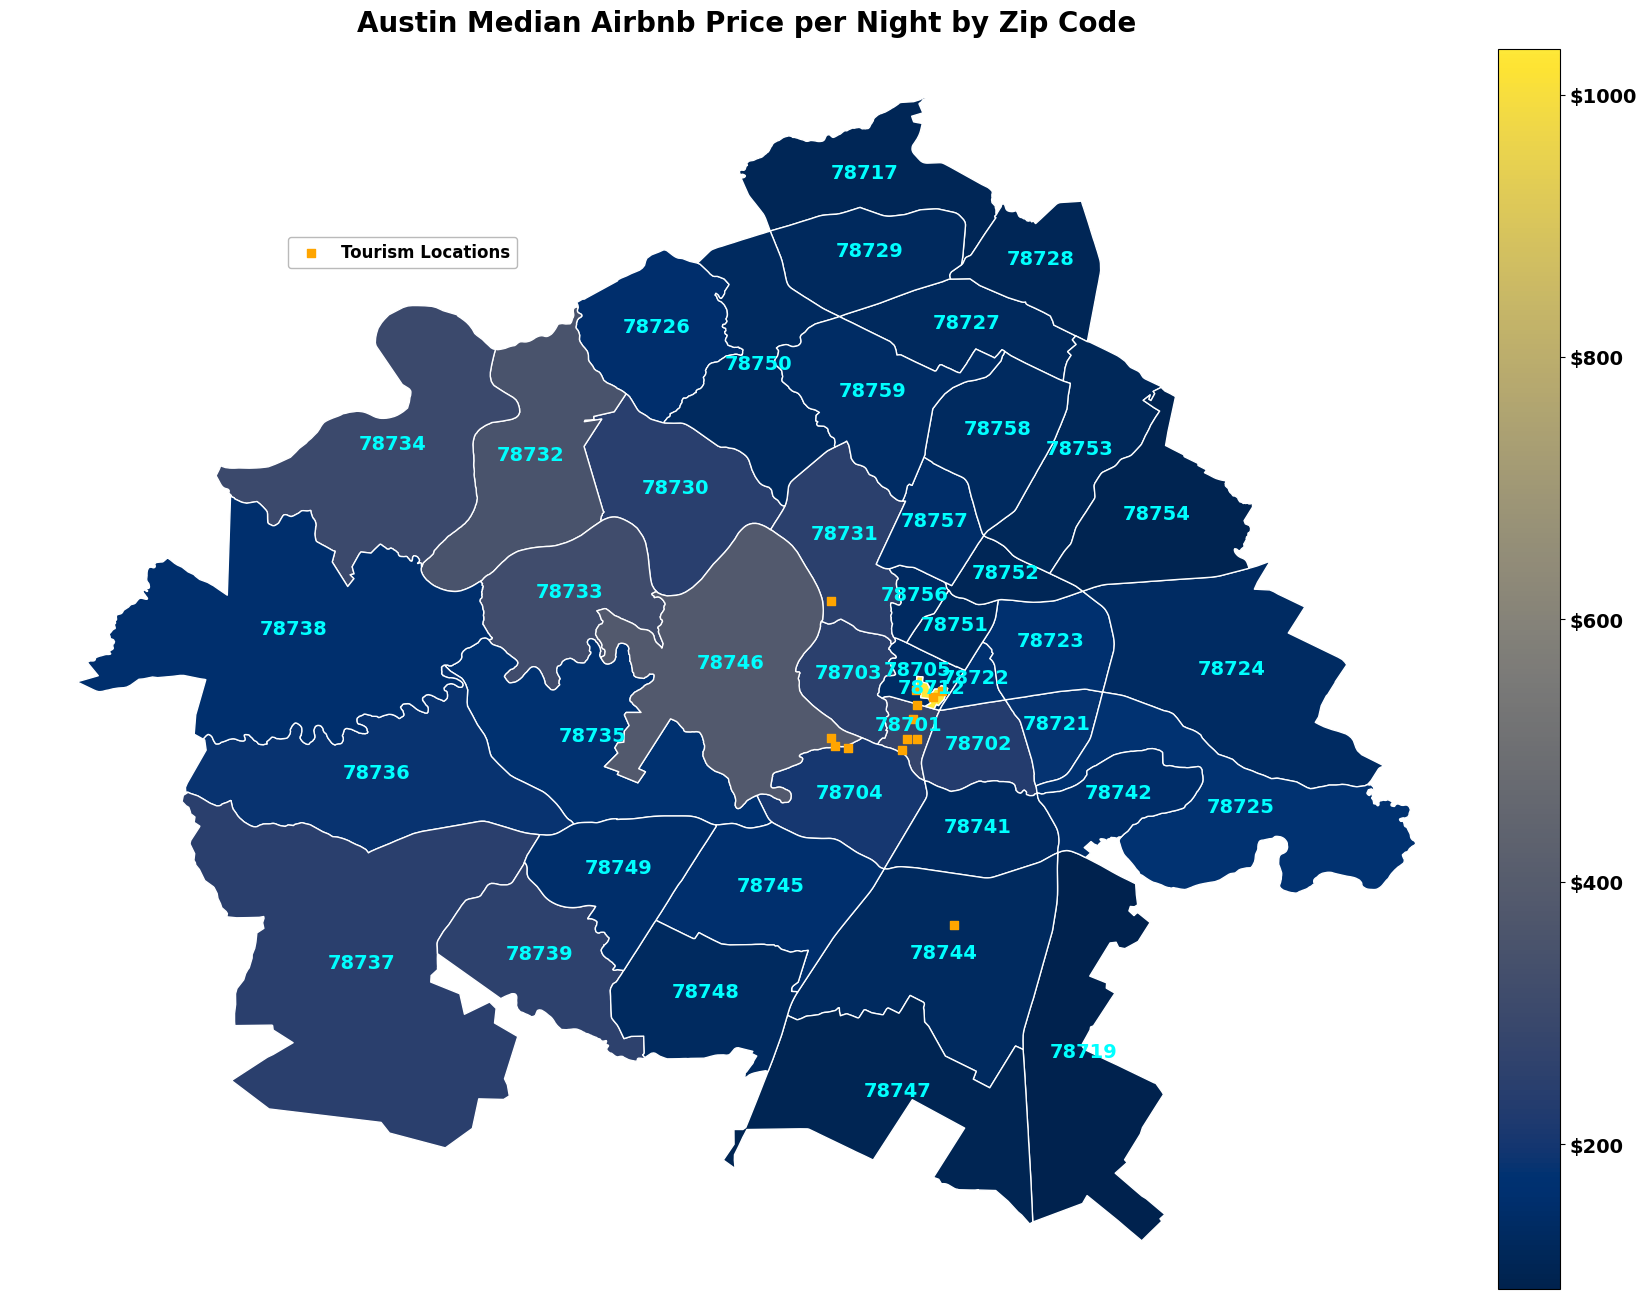

In [35]:
'''
Visual of top tourism locations overlay onto Austin Zip Code boundary map. 
Zip codes are color gradient to represent median price for one night across all listings in each respective zip code.
'''

top_locs["Point"] = top_locs.apply(lambda row: \
                                         Point(row["longitude"], \
                                               row["latitude"]), axis=1)
top_locs = gpd.GeoDataFrame(top_locs, geometry="Point")


price_df = list_prices.pivot_table(index="neighbourhood_cleansed", values="price", aggfunc="median")
price_df = austin_map.merge(price_df, how="right", left_on="zipcode", right_on="neighbourhood_cleansed")
price_df = price_df.set_index("zipcode")

fig, ax = plt.subplots(figsize=(20,20))

base = price_df.plot(column="price", cmap="cividis", \
                     edgecolor="white", ax=ax)
price_df.apply(lambda x: ax.annotate(text=x.name, \
                                     xy=x.geometry.centroid.coords[0], \
                                     ha="center", fontweight="bold", \
                                     fontsize=14, color="cyan"), axis=1)
base.axis("off")

min_price = price_df["price"].min()
max_price = price_df["price"].max()
gradient = plt.cm.ScalarMappable(cmap="cividis", \
                                 norm=plt.Normalize(vmin=min_price, \
                                                    vmax=max_price))


top_locs.plot(ax=base, color="orange", marker="s", markersize=40, label="Tourism Locations")
gradient._A = []

cbar = fig.colorbar(gradient, fraction=0.04, pad=.01)
cbar.ax.set_yticklabels(['$0', '$200', '$400', '$600', '$800', '$1000', '$1200'], fontdict={'fontsize': 14, 'fontweight':'bold'})

legend = plt.legend(facecolor="w", edgecolor="darkgray", prop={'size':12, 'weight':'bold'})
legend.set_bbox_to_anchor((0.25, 0.75, 0.10, 0.10))


plt.title("Austin Median Airbnb Price per Night by Zip Code", fontsize=20, fontweight="bold")

plt.show()